# TP 2 - Differential Privacy
***Binôme Stéphanie ROUXEL & Hy-Boui CHANG***

Juillet 2020

# Differential Privacy

Among the numerous definition of private data analysis,
differential privacy has become the dominant standard by providing a formal and adaptive conception of safe data-analysis. First introduced by Dwork et al. in [1], and further detailed in [2]. It states that an algorithm is  differentially private if, given two **close** databases, it produces statistically indistinguishable outputs.
Formally, a randomized algorithm $\mathcal{A}$ is $\epsilon$-differentially private if for any output $Z$ and for any two close databases $X$ and $X'$, $$\mathbb{P}[\mathcal{A}(X) \in Z] \leq e^{\epsilon}\mathbb{P}\left[\mathcal{A}(X') \in Z\right]. \text{   } (1)$$
Where the probability space is over the coin flips of $\mathcal{A}$.

Here, $\mathbb{P}[\mathcal{A}(X) \in Z]$ is the probability of a
randomized function $\mathcal{A}$ to ouput a value in $Z$ when evaluating
it on a given dataset $X$. The right side is identical to the left except
that the function is now evaluated on a dataset $X'$ that differs from $X$
in at most one element (hence the notion of **closness**). And finally, $\epsilon$ is a parameter that describes
how much information is leaked by the function.


Sounds pretty abstract, so let's work out a simple example: Let's assume we want to build a differentially private dataset from the adult data that we've looked at in the first session. The goal here is to protect an adversary from gaining too much information about the sensitive attribute (income > 50k or not) when adding that Alice's data to the dataset. With differential privacy, we look at the state of the dataset before and after Alice was added and quantify the privacy loss as given by equation (1). Let us suppose that $\mathcal{A}$ outputs the total number of persons with income > 50k in deterministic fashion. Then by simply comparing the output value of $\mathcal{A}$ before and after the adding Alice to the dataset, we can infer with certainty what kind of income Alice has. This highlights the fact that any deterministic analysis of a dataset represents a security breach, this is why the curator is needed to input some kind of randomness that will help preserving privacy.



Let us now investigate a simple randomization trick called **randomized response**. It works as follows:

* With probability $1-p$, we add a Alice's true income value to the database.
* With probability $p$ we choose a random boolean (0/1) value from a distribution returning $0$ with probability $q$ and $1$ with probability $1-q$ and add that value to the database instead.

**We denote 0/1 for generality, but for our application 1 means "income > 50k" and 0 means "income =< 50k"**

Using this scheme, an attacker cannot know with certainty if the real attribute value of Alice or a random one was added to the database. This protects the privacy of Alice but of course it also adds noise to the database, making it more difficult to use for legitimate users as well. In practice, we therefore always need to weigh privacy against utility when employing differential privacy. In this notebook, we will calculate the $\epsilon$ and other relevant parameters for our scheme above and see how we can use this differentially private data to make predictions about the 
income distribution of the people in our dataset.

* [1] [Differential privacy](https://www.microsoft.com/en-us/research/publication/differential-privacy/)
* [2] [The Algorithmic Foundations of Differential Privacy](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf)


## Calculating $\epsilon$

In our differentially private scheme, the probability of adding the true attribute value to the database is $1-p$. The probability of adding a random value is therefore $p$ and the probability of that value being $0$ is $q$. So how can we relate this to eq. (1)? Well, we can set $X$ and $X'$ as the versions of our database **before** and **after** adding Alice's data to it. Let's say that before adding Alice there are $k$ $1$'s in the database. We can then use a query $\mathcal{A}$ that returns the number of $1$'s in the database and choose our result set as $Z = \{n\}$. Before adding Alice to the database, $\mathcal{A}(X)=k$ with certainty, hence $\mathbb{P}(\mathcal{A}(X) = k)=1$. After adding Alice's data, the probability that the query result is still $k$ can be calculated as follows, depending on the Alice's attribute value:

* If Alice's attribute value is $0$, the probability that $\mathcal{A}$ is unchanged after adding the data to the database is given as $1-p+p\cdot q$.
* If a Alice's attribute value is $1$, the probability that $\mathcal{A}$ is unchanged after adding the data to the database is given as $p\cdot q$.

We therefore have the two equations

$$
\begin{eqnarray}
\mathbb{P}[\mathcal{A}(X) \in Z | x_i=1] & = & 1 \le \exp{\epsilon}\cdot \mathbb{P}[\mathcal{
A}(X') \in Z | x_i=1] = \exp{\epsilon}\cdot p \cdot q \\
\mathbb{P}[\mathcal{A}(X) \in Z | x_i=0] & = & 1 \le \exp{\epsilon}\cdot \mathbb{P}[\mathcal{A}(X') \in Z | x_i=0] = \exp{\epsilon}\cdot (1-p+p \cdot q) \\
\end{eqnarray}
$$

This leads to

$$
\begin{eqnarray}
\epsilon & \ge & -\ln{\left(p \cdot q\right)} \\
\epsilon & \ge & -\ln{\left(1-p+p\cdot q\right)} \\
\end{eqnarray}
$$

Since we're interested in an upper bound for $\epsilon$ and since $-\ln{\left(1-p+p\cdot q\right)} \le -\ln{p\cdot q}$, we get

$$
\begin{equation}
\epsilon = -\ln{\left(p\cdot q\right)}
\end{equation}
$$


## Exercise 

* To your point of view, what value of $\epsilon$ represent a good enough uncertainty for the adversary? 
* How does the level of privacy evolve when $\epsilon$ gets bigger/smaller? 
* Same question for the accuracy of $\mathcal{A}$.



$\epsilon$ represents a metric of privacy loss at a differentially change in data (adding, removing 1 entry). The smaller the value, the better the privacy but the worse the accuracy of any results from analysing the data.

==> So the goal is to chose an $\epsilon$ small enough but keeping acceptable accuracy of $\mathcal{A}$ (ie the closeness of the output of $\mathcal{A}$ algorithms to the pure output).


## Exercise

**Write a function that returns the value of epsilon for a given $p$ and $q$.**

The formula for $\epsilon$ is the following :

$$
\begin{equation}
\epsilon = -\ln{\left(p\cdot q\right)}
\end{equation}
$$


In [ ]:
import numpy as np

def epsilon(p, q):
    """
    :param p: The probability of returning a random value instead of the true one
    :param q: The probability of returning 1 when generating a random value
    :returns: The epsilon for the given values of p, q
    """
    eps=0
    eps=-np.log(p*q)
    return eps

In [ ]:
# test

print("For p=1, q=1, we get epsilon=", epsilon(1, 1))
print("For p=0.7, q=0.8, we get epsilon=", epsilon(0.7, 0.8))
print("For p=0.3, q=0.5, we get epsilon=", epsilon(0.3, 0.5))
print("For p=0.1, q=0.1, we get epsilon=", epsilon(0.1, 0.1))
print("For p=0.01, q=0.01, we get epsilon=", epsilon(0.01, 0.01))

For p=1, q=1, we get epsilon= -0.0
For p=0.7, q=0.8, we get epsilon= 0.5798184952529423
For p=0.3, q=0.5, we get epsilon= 1.8971199848858813
For p=0.1, q=0.1, we get epsilon= 4.605170185988091
For p=0.01, q=0.01, we get epsilon= 9.210340371976182


## Exercise

**Plot $\epsilon$ for various values of $p$ and $q$. Analyze.**

C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


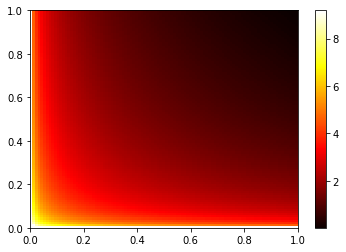

In [ ]:
# Please find here the function for visualization

import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0, 1, 100)
q = np.linspace(0, 1, 100)
X, Y = np.meshgrid(p, q)

#plt.pcolor(X, Y, epsilon(X, Y), cmap=plt.cm.hot)
plt.pcolormesh(X, Y, epsilon(X, Y), cmap=plt.cm.hot)
plt.colorbar()
plt.show()

We observe that for high p and high q (values closed to 1), we get small $\epsilon$ (closed to 0).


# A Different Scheme

Let's assume we propose the following anonymization scheme for our dataset:

* With probability $1-p$, we add a person's true attribute value to the database
* With probability $p$, we do not add anything to the database

## Exercise

Can you calculate the $\epsilon$ of this scheme? Which scheme do you prefer, and why? Does this scheme always provide "plausible deniability"?

We have :
* $1-p$ : probability to add the true attribute
* $p$ : no add
* and k = number of "1"

Lets make assumptions as before :

* If Alice's attribute value is $0$, the probability that $\mathcal{A}$ is unchanged is given as $(1-p) + p$.
* If a Alice's attribute value is $1$, the probability that $\mathcal{A}$ is unchanged is given as $p$.

We therefore have the two equations

$$
\begin{eqnarray}
\mathbb{P}[\mathcal{A}(X) \in Z | x_i=1] & = & 1 \le \exp{\epsilon}\cdot \mathbb{P}[\mathcal{
A}(X') \in Z | x_i=1] = \exp{\epsilon}\cdot ((1-p) + p) \\
\mathbb{P}[\mathcal{A}(X) \in Z | x_i=0] & = & 1 \le \exp{\epsilon}\cdot \mathbb{P}[\mathcal{A}(X') \in Z | x_i=0] = \exp{\epsilon}\cdot p \\
\end{eqnarray}
$$

This leads to

$$
\begin{eqnarray}
\epsilon & \ge & -\ln{(1-p + p)} \\
\epsilon & \ge & -\ln{(p)} \\
\end{eqnarray}
$$

As before, we're interested in an upper bound for $\epsilon$ and since $-\ln{(1)} \le -\ln{p}$, we get

$$
\begin{equation}
\epsilon = -\ln{p}
\end{equation}
$$



This scheme provides "pausible deniability" but we have to take care to chose a good value of p for analysis :

- If (1-p) is high (true value given), the privacy is low but the accuracy is good.

- If (1-p) is low, the privacy protection is high, but the data analyst should use a large quantity of data to increase the accuracy of analysis.

## What does this tell us?

Calculating the $\epsilon$ is great, but what does it actually tell us about the privacy loss or risk for our use case? Let's assume an adversary want to learn about the real value of a person's attribute. If she knows the model used for generating the data, she could then use Bayesian reasoning to calculate the probability of a person's attribute being $1$ given the observed difference in the database, which we denote $\Delta = \mathcal{A}(X') - \mathcal{A}(X)$. Using Bayes theorem we can calculate this as (for $\Delta = 1$ here)

$$
\begin{equation}
    P(x_i=1 | \Delta = 1) = P(\Delta = 1| x_i = 1)\cdot \frac{P(x_i=1)}{P(\Delta=1)}
\end{equation}
$$

For our scheme, we know that 

$$
\begin{equation}
    P(\Delta = 1 | x_i = \mathrm{1}) = 1-pq
\end{equation}
$$

and

$$
\begin{equation}
    P(\Delta = 1) = (1-p)\cdot P(x_i = \mathrm{1}) + p\cdot(1-q)
\end{equation}
$$

so we obtain

$$
\begin{equation}
    P(x_i=1 | \Delta = 1) = \frac{(1-pq)\cdot P(x_i = \mathrm{1})}{(1-p)\cdot P(x_i = \mathrm{1})+p\cdot(1-q)}
\end{equation}
$$

Let's see how this relates to $\epsilon$!

## Exercise

**Write a function that calculates the conditional probability as given in eq. (4).**

In [ ]:
# Please find here the function which will calculate
# the conditional probalibity of xi=1 knowing delta=1

def p_cond(p, q, p_1):
    """
    :param   p: The probability of returning a random value instead of the true one
    :param   q: The probability of returning 1 when generating a random value
    :param p_1: The probability of a person to have an attribute value x_i=1
    """
    return ((1-p*q)*p_1) / ((1-p) * p_1 + p * (1-q))

In [ ]:
# test on this function

p_cond(0.2, 0.5, 0.4)

0.8571428571428572

## Exercise

**Choose a given q (e.g. 0.1) as well as a value for P(x_i=yes) and plot the conditional probability from eq. (4) as a function of p.**

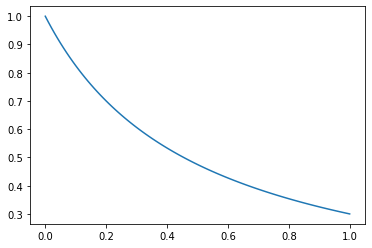

In [ ]:
# Please find here a graph which
# gives the evolution of the function p_cond, with q = 0.1 (fixed) and knowing P(x_i = 1)
# The function's variable is p

def graphe (f, a, b, N, q, p_1):
    lx = [a+i*(b-a)/N for i in range(N+1)]
    ly = [f(p, q, p_1) for p in lx]
    plt.plot(lx,ly)
    plt.show()  

q=0.1
p_1=0.3

graphe(p_cond, 0, 1, 100, q, p_1)


We can conclude that p_cond decreases as p increases.
If p=1, the probability to get xi=1 is closed to zero. 

eps = - ln(p) and, for p=1, we have eps = -ln(1) = 0 ==> with p closed to 1, we have p-cond closed to zero and eps closed to zero.

# Implementing It

Now that we have a feeling for our scheme we can implement it! For that, we load the "adult census" data from the k-anonymity case study again.

In [ ]:
import pandas as pd

names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
)
categorical = set((
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'sex',
    'native-country',
    'race',
    'income',
))
df = pd.read_csv("data/adult.all.txt", sep=", ", header=None, names=names, index_col=False, engine='python');# We load the data using Pandas

In [ ]:
# visualization of first data

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k


## Exercise

**Implement a function that processes a new value according to the differentially private scheme discussed above.**

In [ ]:
import random

def process_value(value, p, q):
    """
    :param value: The value to apply the differentially private scheme to.
    :param     p: The probability of returning a random value instead of the true one
    :param     q: The probability of returning 1 when generating a random value
    :    returns: A new, differentially private value
    """
    a = random.random()

    # case where the real initiale value is not given, but a random value (1 or 0) knowing the probability of q
    if a <= p:
        b = random.random()
        if b <= q:
            return 0
        return 1

    # cas where the real value is given (ie the initial value)
    else:
        return value 

## Exercise

**Now apply this method to the "income" column of the adult dataset to obtain a differentially private dataset e.g with p=q=0.5.**

In [ ]:
import numpy as np

# Step 1
# We transform the incomes values into binary values ==> new column "income_bin"
df['income_bin'] = np.where(df['income'] == '<=50k', 0, 1)

df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bin,income_modifie
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k,0,0


In [ ]:
# Step 2 : function PROCESS_VALUE is applied, to add privacy
# in other words, here, we modify the real value randomly using p et q
# a new column is added : "income_modifié" ==> this column will be used for confidential privacy

p = 0.5
q = 0.5
values = []

df['income_modifie'] = 0

for i, x in enumerate(df['income_bin']):
    values.append(process_value(x, p, q))

df['income_modifie'] = np.array(values)
#df['income_modifie'][:10]

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bin,income_modifie
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k,0,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50k,0,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50k,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50k,1,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50k,1,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50k,1,1


# Working With Differentially Private Data

After collecting the differentially private data, we want of course to make use of it! For example, we might want to estimate the probability of a person having an income > 50K based on the data we've collected, which we assume is Bernoulli distributed with a probability $p_{1}$ for every individual in the database. Now, when adding up the data from $n$ persons, the resulting value is binomially distributed. The mean of this distribution is given as $\mathbb{E}_{1} = n\cdot p_{1}$ and the variance as $\mathbb{V}_1 = n\cdot p_1 \cdot (1-p_1)$. A consistent and unbiased estimator of $\mathbb{E}_1$ is $\hat{\mathbb{E}}_{1} = \sum_i x_i$, which then gives an estimate for $p_{1}$ of $\hat{p}_{1} = \hat{\mathbb{E}}_1/n$.

Now, if we apply the differential privacy mechanism to our dataset, the probability of obtaining a $1$ will change to $p_{1,dp} = (1-p)\cdot p_{1}+p\cdot(1-q)$. Therefore, an unbiased and consistent estimator of $p_1$ based on $p_{1,dp}$ is given as
$$
\begin{equation}
\hat{p}_1 = \frac{\hat{p}_{1,dp}-p\cdot(1-q)}{1-p}
\end{equation}
$$

As before, $\hat{p}_{1,dp}=\sum_i x_{i,dp}/n$. Note that this naive estimator can return a negative probability, which can be avoided by using a more suitable method like a maximum likelihood estimator.

## Exercise

**Write an estimator for $\hat{p}_1$ based on a differentially private dataset with parameters $p$ and $k$..**

In [ ]:
def p_1_estimator(p_1dp, p, q):
    """
    :param p_1dp: The empirical probability of x_i=1 of our DP dataset.
    :param     p: The p value of our DP scheme.
    :param     q: The q value of our DP scheme.
    :    returns: An estimate of p_1 of our DP dataset.
    """
    return (p_1dp-p*(1-q))/(1-p)

## Exercise

**Apply the estimator to the differentially private dataset created above to generate an estimate of $p_1$.**

In [ ]:
# Let's first calculate the value of p_1 (the true value).
# To do that, we will use the column "income_bin" just created before (value of 1 when the income is > 50k, 0 otherwise).
# We will sum up all the "1" value, then divide the result by the number of lines (so the lenght of our dataset).

p_1 = df['income_bin'].sum()/len(df)
print(p_1)

0.23928176569346055


In [ ]:
# Now, let's calculate the p_1dp value.
# Here, we will use the column "income_modifie" to determine this value.
# Recall that the value of p and q used, were p = q = 0.5.

p_1dp = df['income_modifie'].sum()/len(df)
print(p_1dp)

0.36914950247737605


In [ ]:
# What about the value of the p_1_estimator ?
# We will apply the function to discover it :

p = 0.5
q = 0.5

p_1_estim = p_1_estimator(p_1dp, p, q)
print(p_1_estim)

0.2382990049547521


We see that our estimator of p_1 is not too bad.
The true value is 0.239, the calculation of estimated value is 0.237.

## Exercise

**Write a function that estimates the variance of $\hat{p}_{1}$ and calculate its value for the case above.**

Hint: The variance of $\hat{p}_1$ can be estimated as $$\hat{\mathrm{Var}}_1 = \frac{\hat{\mathrm{Var}}_{1,dp}}{(1-p)^2} = \frac{\hat{p}_{1,dp}\cdot(1-\hat{p}_{1,dp})}{(1-p)^2\cdot n}$$

In [ ]:
def var_1_estimator(p_1dp, n, p, q):
    """
    :param p_1dp: The estimates probability of our DP dataset.
    :param     n: The number of samples in our dataset.
    :param     p: The p value of our DP scheme.
    :param     q: The q value of our DP scheme.
    :    returns: An estimate of the variance of our DP dataset.
    """
    return p_1dp*(1-p_1dp)/(1-p)**2/n

var_1_hat = var_1_estimator(p_1dp, len(df), p, q)
var_1_hat

1.9071958338977254e-05

## Exercise

**Repeat the data generation process $N$ (e.g. 500) times. For each resulting dataset, estimate $\hat{p}_1$ and store the value in a list, so that we can plot it later.**

In [ ]:
p_1_hats = []

df['income_binary'] = np.where(df['income'] == '<=50k', 0, 1)
df['income_dp'] = 0

for j in range(500):

    values = []
    for i, x in enumerate(df['income_binary']):
        values.append (process_value(x, p, q))

    df['income_dp'] = np.array(values)
    p_1dp = df['income_dp'].sum()/len(df)
    p_1_hat = p_1_estimator(p_1dp, p, q)
    p_1_hats.append(p_1_hat)

p_1_hats = np.array(p_1_hats)

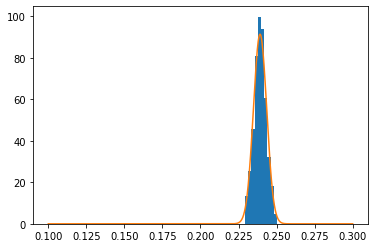

In [ ]:
# We then compare these estimates to the expected distribution (via central limit theorem: a normal distribution
# with expectation p_1 and variance var_1_hat)

import matplotlib.pylab as plt

plt.hist(p_1_hats, density=True)

gauss = lambda x, mu, var: 1/np.sqrt(2*np.pi*var)*np.exp(-(x-mu)**2/(2*var))

p_1_hat = p_1_hats.mean()

x = np.linspace(0.1, 0.3, 1000)

plt.plot(x, gauss(x, p_1_hat, var_1_hat));

# Another scheme: Laplace mechanism. 

We can now estimate the probability of a categorial private feature from accuring in $X$. But what about numerical features? For example, let us suppose that the database $X$ contains the real people incomes. We still would like to be able to estimate the mean income of the population in a private way. First let us introduce what a Laplace distribution is. A Laplace distribution with scale $b$ that is the distribution with probability density 

$$Lap(x|b)=\frac{1}{2b}exp\left(-\frac{|x|}{b}\right).$$


To manage this kind of problem, we intoduce another simple randomization scheme called **Laplace mechanism**: 

* Sample $s$ a random noise from a laplace distribution with scale $\frac{\Delta}{\epsilon}$, where $\Delta$ is the maximum difference of income two people could have. For example we consider that the minimum income is $0$ and the maximum is 200 000 dollars, hence $\Delta=200 000$.
* Add $s$ to Alice's true income to get a private income for Alice. 

For this scheme, calculating $\epsilon$ is trivial, since it is directly in the distribution scale.

## Implementing it

To implement this scheme, we load a modified version of the "adult census" data from the k-anonymity where incomes are numerical. 

In [ ]:
import pandas as pd

names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income-numerical',
)
categorical = set((
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'sex',
    'native-country',
    'race',
))
df = pd.read_csv("data/adult.all.numerical.txt", sep=" ", header=None, names=names, index_col=False, engine='python');# We load the data using Pandas

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-numerical
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,21467
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,33405
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,20462
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,22867
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,25853


## Exercise 

**Write a function that generates a random sample from a Laplace distribution with scale $b$.**

**Hint: You can use numpy.random or learn more about how to generate noises [here](https://en.wikipedia.org/wiki/Inverse_transform_sampling).**

In [ ]:
def simlap(n, b):
    """
    :param     n: The number of samples to draw
    :param     b: Scale of the distribution.
    :    returns: a vector of size n with noises sample from laplace dristribution.
    """

In [ ]:
# In order to generate samples from a Laplace distribution with scale b,
# we will generate two independent exponential samples with mean b and return their difference.
# The Laplace distribution is also called the double exponential because it looks like 
# two mirror-image exponential distributions glued together.

from math import log
from random import random

def simlap(n, b):
    vector=[]
    for i in range(n):
        e1 = -b*log(random())
        e2 = -b*log(random())
        vector.append(e1 - e2)
    return np.array(vector)

# test
simlap(10,1)

array([-0.42308878, -1.97182811, -2.16800846, -1.06732876,  0.93376359,
        1.74662955,  0.29968179, -2.8554637 , -0.71536558,  0.153993  ])

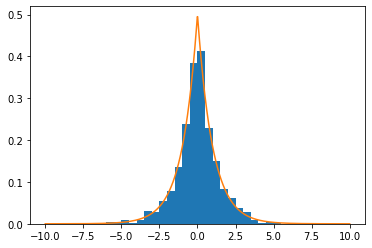

In [ ]:
# We now plot the histogram of the sampled noise against the density 
# of a laplace distribution to check if they match

import matplotlib.pyplot as plt

b=1
n=1000

l = simlap(n,b)
plt.hist(l,  density=True, bins=[float(i)/2 for i in range(-20,21)])

laplace = lambda x, b: 1/(2*b)*np.exp(-np.abs(x)/b)

x = np.linspace(-10, 10, 1000)

plt.plot(x, laplace(x, b));

## Exercise

**Now apply Laplace mechanism to the "income-numerical" column of the adult dataset to obtain a differentially private dataset with $\epsilon =1$.**

In [ ]:
'''import numpy as np

epsilon=1

df['income_dp'] = ...
'''

In [ ]:
# We apply now laplace noise into the data

import numpy as np

epsilon=1

# scale b = delta / epsilon
# first, we need to calculate delta = max(income)-min(income)
delta = max(df['income-numerical']) - min(df['income-numerical'])
b=delta/epsilon
print("Avec epsilon = ", epsilon, "et delta = ", delta, ", on obtient b = ", b)

# calculation of the new column of income with Laplace noise added
df['income_dp'] = df['income-numerical']+ simlap(len(df['income-numerical']), b)

# check of the new column "income_dp"
df.head()

Avec epsilon =  1 et delta =  89491 , on obtient b =  89491.0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-numerical,income_dp
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,21467,47360.281236
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,33405,51124.576730
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,20462,-358466.035199
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,22867,-208182.098525
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,25853,85492.243455


## Exercise

**compare a few of the lines from the private and non private columns. Would you say the data would still be useful for a statistical analysis? Compute the mean of each columns and discuss.**

In [ ]:
df.head()

In [ ]:
# Comparison of the means

mean_origin = df['income-numerical'].mean()
print("La moyenne des revenues est de ", mean_origin)

mean_dpLaplace = df['income_dp'].mean()
print("La moyenne des revenues bruitées avec Laplace est de ", mean_dpLaplace)

print("la différence est faible, elle est de ", mean_dpLaplace-mean_origin, "soit ", (mean_dpLaplace-mean_origin)/mean_origin)

La moyenne des revenues est de  36968.47587068242
La moyenne des revenues bruitées avec Laplace est de  36556.63244010246
la différence est faible, elle est de  -411.8434305799601 soit  -0.011140395184822037


**Conclusion**

This method to add Laplace noise works well on numerical values, as long as the data does not have extreme values, because here we are interested by the mean.
 